## Description: Program to Analyse and Predict Breast Cancer:
Breast cancer is the most common invasive cancer in women and the second leading cause of cancer death  in  women  after lung  cancer.Advances in screening and treatment for breast cancer have improved survival rates dramatically since 1989. Early screening,leading to detection has,from statistics,led to the increase in survival rates.There is a possibility of detecting cancer at an early stage, based on features collected from the patients.Breast cancer can occur in women and rarely in men.
## Symptoms:
Symptons of breast cancer include a lump in the breast,bloody discharge from the nipple and changes in the shape or texture of the nipple or breast.
## Treatment:
Treatment depends on the stage of cancer. It may consist of chemotherapy, radiation and surgery.
## Dataset: 
Breast Cancer Wisconsin (Diagnostic) Data set
## The Problem at Hand:
The possibility of detecting cancer at an early stage,based on features collected from the patient.To also analyse the data and build a model that would detect cancerous cells with good accuracy.
## Predictive Models: 
#1-Logistic Regression 
#2-Decision Tree 
#3-Random Forest 

The choice of these algorithms is sequel upon the desire to keep the model very explanatory of itself.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
#Load the data
df = pd.read_csv('breastcancer.csv')

In [3]:
#Head
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#Count the number of rows and columns in the dataset
df.shape

(569, 33)

In [6]:
#Count the number of empty values in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Drop the colume with the missing values
df.dropna(axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#Get the new count of the number of rows and columns
df.shape

(569, 33)

In [9]:
#Get a count of the number of Malignant (M) or Benign (B) cells 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

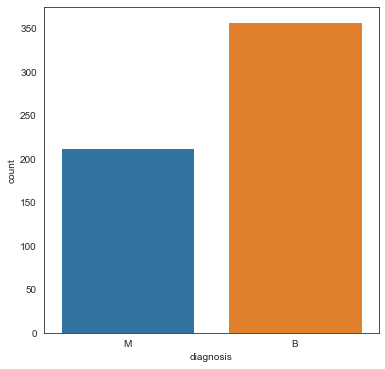

In [10]:
#Let's visualize the count
sns.set_style('white')
sns.set_context({'figure.figsize': (6,6)})
sns.countplot(df['diagnosis'], label='count')

## we can see from the visualization above that there are more patients with Benign cells who don't have cancer than there are patients who have cancer(Malignant)

In [11]:
#Let's consider the data types to see which columns need to be encoded

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#Encode the categorical data value
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]
 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

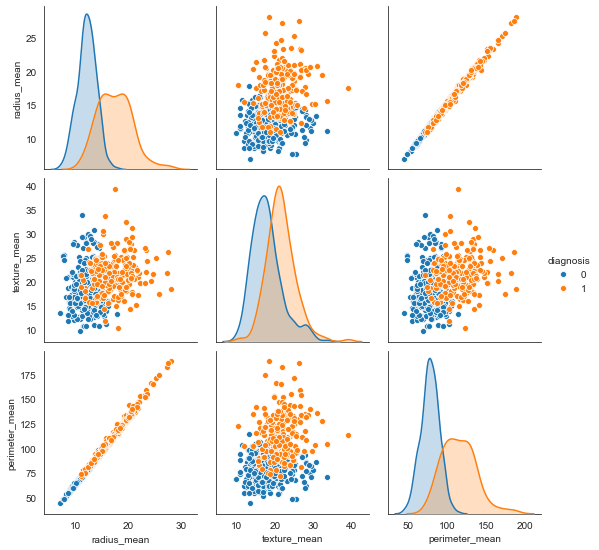

In [13]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [14]:
#Let's print the rows of the new data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Correlation:
# It allows us to make a comparison between quantitative values according to their effect on each other

# Keys:
# 1 indicates a perfect positive correlation.,
# -1 indicates a perfect negative correlation.,
# 0 tells us that there is no relation between the two values

In [15]:
#Let's get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


# We can see from above that radius_mean has an influence on the diagnosis column
# We can see again that texture_mean has an influence on the diagnosis column
# We can also see here that fractal_dimension_mean has a negative influence on the diagnosis

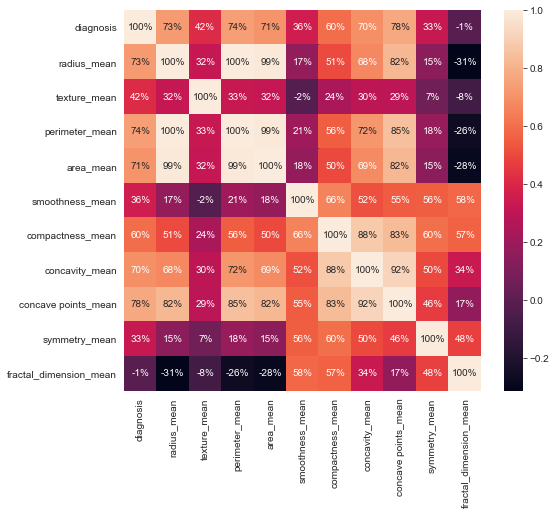

In [16]:
#Visualize the correlation
plt.figure(figsize=(8,7))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') 

In [17]:
#Split the dataset into independent (X) and dependent (Y) datasets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

# Our dependent value(Y) is going to tell us if the patient has cancer or not
# Our independent value is going to tell us the features that will help us determine if the patient has cancer 

In [18]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state =  0)

In [19]:
#Scale the data(feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train


array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.69592933,
        -0.36433881,  0.32349851],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.29277423,
        -1.45036679,  0.62563098],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.26255563,
         0.72504581, -0.51329768],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.78274313,
        -0.98806491, -0.69995543],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.36015587,
        -1.75887319, -1.56206114],
       [-0.74662205,  1.14066273, -0.72203706, ...,  0.47201917,
        -0.2860679 , -1.24094654]])

# Logistic Regression:
It is a mathematical model used in statistics to estimate(guess) the probability of an event occurring having been given some previous data.Logistic Regression works with binary data.Linear regression is not suitable for classification problem.
# Random Forest Classifier:
Random Forest is a supervised learning algorithm.It can be used both for classification and regression.It is also the most flexible and easy to use algorithm.Some applications of Random Forest include in image classification and feature selection,it can be used to classify loyal loans applicants,identify fraudulent activity and predict diseases.This is why it was deployed for this dataset.
# Decision Tree:
A Decision Tree is a simple representation for classifying examples.It is a supervised Machine Learning where the data is continuously split according to a certain parameter.

In [20]:
#Let's create a function for the models
def models(X_train, Y_train):
    
    #Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Using Decision Tree Classifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    
    #Using RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train, Y_train)
    
    #Let's print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest
   
    
   

In [21]:
#Let's get all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 1.0


# For the training data model,the Decision Tree Classifier and the Random Forest Classifier did better than the Logistic Regression model

## Confusion Matrix:
 The confusion matrix, also known as the error matrix, is a summary of prediction results on a classification problem.The number of correct and incorrect predictions are summarized with count values and broken down by each class.It shows the ways in which your classification model is confused when it makes predictions.It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.It allows visualization of the performance of an algorithm :

# True Positive (TP) : Malignant tumour correctly identified as malignant
# True Negative (TN) : Benign tumour correctly identified as benign
# False Positive (FP) : Benign tumour incorrectly identified as malignant
# False Negative (FN) : Malignant tumour incorrectly identified as benign

## Metrics :

# Testing Accuracy : (TP +TN) / (TP + TN + FP +FN)
# Precision : TP / (TP + FP)
# Recall : TP / (TP + FN)

In [22]:
#We will now test our model accuracy using confusion matrix

for i in range(len(model)):
    print('Model', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]


    print(cm)
    print('Testing Accuracy =', (TP +TN) / (TP + TN + FP +FN))
    print('Precision =', (TP) / (TP + FP))
    print('Recall =', (TP) / (TP + FN))
    print()


Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy = 0.951048951048951
Precision = 0.9662921348314607
Recall = 0.9555555555555556

Model 1
[[80 10]
 [ 3 50]]
Testing Accuracy = 0.9090909090909091
Precision = 0.963855421686747
Recall = 0.8888888888888888

Model 2
[[87  3]
 [ 1 52]]
Testing Accuracy = 0.972027972027972
Precision = 0.9886363636363636
Recall = 0.9666666666666667



## Model 0-Logistic Regression:
The model has a True Positive(TP) of 86, and a True Negative(TN) value of 50. It also has a False Positive(FP) of 4, and a False Negative(FN) value of 3.
It has a Testing Accuracy of 0.951%.It has a precision of 0.966%, and a Recall of 0.955%.
## Model 1-Decision Tree:
This model has a True Positive(TP) value of 76,and True Negative(TN) value of 50.It has a False Positive(FP) of 14,and a False Negative(FN) value of 3.
It has a Testing Accuracy of 0.881%.It has a Precision of 0.962%, and a Recall of 0.844%.
## Model 2-Random Forest:
This model has a True Positive(TP) value of 87,and a True Negative(TN) of 51.It also has a False Positive(FP) value of 3,and a False Negative(FN) value of 2.
The model has a Testing Accuracy of 0.965%.It has a precision of 0.978%,and a Recall of 0.967%.

# The model that does the best on the Testing data is the Random Forest Classifier.It also does the best with regards to Precision and Recall.It is followed by Logistic Regression and lastly,by Decision Tree

## Final Analysis:
We want to find out if the patient have cancer of if the patient doesn't have cancer.
 Firstly, we will print out the prediction,and then a new line of code that will contain the actual values

In [23]:
#We will now print the prediction of Random Forest Classifier Model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


## Final Prediction:
 Output: First is what our model predicted for each of the patient whether or not they have cancer.
 The second part of our codes contains the actual values of the patients showing if they have cancer or not.

